<a href="https://colab.research.google.com/github/bcury/Machine-Learning-Projects/blob/main/ML_Estatistica_IntervalosConfian%C3%A7a_Tstudent_TestesHipoteses_KFold_ANOVA_algoritimos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**intervalos de confiança**

In [1]:
import pandas as pd
import numpy as np
import math
import seaborn as sns
from scipy.stats import norm
from scipy import stats

In [2]:
#base de dados

dados = np.array([120,122,129,130,134,139,140,142,144,148,
                 149,150,155,156,159,160,162,163,164,166,
                 168,169,172,174,176,178,178,179,183,185,
                 188,189,190,192,194,195,196,198,198,200])

In [3]:
n = len(dados)
n

40

In [4]:
media = np.mean(dados)
media

165.85

In [5]:
desvio_padrao = np.std(dados)
desvio_padrao

22.7613158670583

In [6]:
stats.sem(dados)

3.6447274879664815

In [8]:
desvio_padrao / math.sqrt(n -1)

3.6447274879664815

In [9]:
#scipy

intervalos = norm.interval(0.95, media, stats.sem(dados))
intervalos

(158.70646539012256, 172.99353460987743)

In [11]:
margem_erro = media - intervalos[0]
margem_erro

7.143534609877435

- Diferentes niveis de confiança

In [12]:
intervalos = norm.interval(0.99, media, stats.sem(dados))
intervalos

(156.46180413304575, 175.23819586695424)

In [13]:
margem_erro = media - intervalos[0]
margem_erro

9.388195866954248

**Distribuição T-Student**

In [14]:
base = np.array([149, 160, 147, 189, 175, 168, 156, 160, 152])

In [16]:
n = len(base)
n

9

In [19]:
media = base.mean()
media

161.77777777777777

In [21]:
desvio_padrao = base.std()
desvio_padrao

12.786953227391823

In [22]:
from scipy.stats import t

In [24]:
intervalos = t.interval(0.95, n -1, media, stats.sem(base,ddof=0)) #ddof graus de liberdade, o padrao é colocar 1
intervalos

(151.9488554388298, 171.60670011672573)

In [25]:
margem_erro = media - intervalos[0]
margem_erro

9.828922338947962

**intervalos de confiança com ML**:
classificação

In [58]:
base_dados = pd.read_csv('/content/credit_data.csv')
base_dados.dropna(inplace=True)

In [60]:
base_dados.head()

,i#clientid,income,age,loan,c#default
0,1,66155.925095,59.017015,8106.532131,0
1,2,34415.153966,48.117153,6564.745018,0
2,3,57317.170063,63.108049,8020.953296,0
3,4,42709.534201,45.751972,6103.642260,0
4,5,66952.688845,18.584336,8770.099235,1


In [61]:
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.metrics import accuracy_score


algoritimos

In [62]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB

In [63]:
x = base_dados.iloc[:,1:4].values
y = base_dados.iloc[:,4].values

In [64]:
x.shape

(1997, 3)

In [65]:
y.shape

(1997,)

vamos fazer um loop para rodarmos os resultados mais vezes, sem dividir em treino e teste

In [66]:
resultados_naives_bayes_cv = []
resultados_naives_bayes_cv_300 = []
resultados_regressaologistica_cv = []
resultados_regressaologistica_cv_300 = []
resultados_randomforest_cv = []
resultados_randomforest_cv_300 = []
for i in range(30):                      #300 é porque sao 30 testes e 10 n_splits(pontes)
  kfold = KFold(n_splits=10, shuffle = True, random_state = i)

  naive_bayes = GaussianNB()
  scores = cross_val_score(naive_bayes, x, y, cv=kfold)
  resultados_naives_bayes_cv_300.append(scores)
  resultados_naives_bayes_cv.append(scores.mean())

  logistica = LogisticRegression()
  scores = cross_val_score(logistica, x, y, cv=kfold)
  resultados_regressaologistica_cv_300.append(scores)
  resultados_regressaologistica_cv.append(scores.mean())

  random_forest = RandomForestClassifier()
  scores = cross_val_score(random_forest, x, y, cv=kfold)
  resultados_randomforest_cv_300.append(scores)
  resultados_randomforest_cv.append(scores.mean())


In [67]:
len(resultados_naives_bayes_cv), len(resultados_naives_bayes_cv_300)

(30, 30)

In [68]:
print(resultados_naives_bayes_cv)

[0.9248618090452261, 0.9249170854271356, 0.9248894472361808, 0.9228819095477387, 0.9248718592964824, 0.9253894472361809, 0.9243844221105528, 0.9248894472361808, 0.9248718592964824, 0.9238894472361808, 0.9253844221105527, 0.9244020100502512, 0.9253743718592965, 0.924394472361809, 0.9253869346733667, 0.9248819095477387, 0.9258844221105527, 0.924894472361809, 0.9238819095477387, 0.9258844221105529, 0.9258944723618091, 0.9253894472361811, 0.92436432160804, 0.9263844221105527, 0.9228944723618092, 0.9253894472361809, 0.9248869346733668, 0.9253919597989949, 0.9253819095477386, 0.9258844221105527]


In [74]:
print(resultados_naives_bayes_cv_300) #formato de matriz

[array([0.91      , 0.93      , 0.96      , 0.925     , 0.94      ,
       0.895     , 0.965     , 0.89949749, 0.87939698, 0.94472362]), array([0.92      , 0.945     , 0.895     , 0.92      , 0.915     ,
       0.93      , 0.89      , 0.94974874, 0.93467337, 0.94974874]), array([0.93      , 0.89      , 0.94      , 0.935     , 0.905     ,
       0.935     , 0.935     , 0.91959799, 0.94472362, 0.91457286]), array([0.91      , 0.945     , 0.95      , 0.94      , 0.92      ,
       0.9       , 0.9       , 0.90954774, 0.91959799, 0.93467337]), array([0.96      , 0.93      , 0.94      , 0.905     , 0.935     ,
       0.93      , 0.905     , 0.90452261, 0.89949749, 0.93969849]), array([0.915     , 0.91      , 0.945     , 0.945     , 0.9       ,
       0.935     , 0.925     , 0.96482412, 0.89949749, 0.91457286]), array([0.955     , 0.935     , 0.915     , 0.94      , 0.905     ,
       0.9       , 0.925     , 0.92462312, 0.92462312, 0.91959799]), array([0.94      , 0.92      , 0.925     , 0.91

In [70]:
len(resultados_randomforest_cv), len(resultados_randomforest_cv_300)

(30, 30)

In [71]:
print(resultados_randomforest_cv)

[0.9854723618090452, 0.9854849246231157, 0.9854798994974875, 0.9869698492462312, 0.9884849246231155, 0.9859849246231155, 0.9874723618090453, 0.9879849246231156, 0.9864824120603016, 0.9859824120603016, 0.9889798994974874, 0.9874773869346735, 0.9864748743718593, 0.9884798994974874, 0.9874849246231155, 0.9879849246231156, 0.9879874371859296, 0.9859673366834171, 0.9864798994974875, 0.9839773869346734, 0.9859748743718593, 0.9864798994974875, 0.9839773869346734, 0.9899824120603015, 0.9879924623115578, 0.9854849246231157, 0.9869798994974875, 0.9839748743718593, 0.9884924623115579, 0.9884874371859297]


In [72]:
len(resultados_regressaologistica_cv), len(resultados_regressaologistica_cv_300)

(30, 30)

In [73]:
print(resultados_regressaologistica_cv)

[0.9113718592964826, 0.9103668341708543, 0.918359296482412, 0.9158768844221106, 0.9133417085427136, 0.9108718592964824, 0.9188366834170856, 0.9188969849246231, 0.913356783919598, 0.9148693467336683, 0.9098718592964824, 0.9183542713567838, 0.9183793969849248, 0.9213618090452261, 0.9098643216080402, 0.914356783919598, 0.9103693467336684, 0.915856783919598, 0.9128542713567839, 0.9123668341708543, 0.9208944723618091, 0.9108668341708542, 0.9103467336683417, 0.9133768844221105, 0.9098592964824121, 0.9148768844221105, 0.910859296482412, 0.9113768844221104, 0.9113668341708543, 0.9098442211055277]


In [75]:
print(resultados_regressaologistica_cv_300) #forma de matriz

[array([0.905     , 0.925     , 0.92      , 0.885     , 0.925     ,
       0.875     , 0.935     , 0.92462312, 0.86934673, 0.94974874]), array([0.895     , 0.945     , 0.905     , 0.925     , 0.915     ,
       0.9       , 0.885     , 0.93969849, 0.90452261, 0.88944724]), array([0.9       , 0.865     , 0.925     , 0.935     , 0.94      ,
       0.93      , 0.97      , 0.88944724, 0.91959799, 0.90954774]), array([0.895     , 0.905     , 0.94      , 0.955     , 0.925     ,
       0.885     , 0.9       , 0.89949749, 0.94472362, 0.90954774]), array([0.96      , 0.925     , 0.91      , 0.905     , 0.915     ,
       0.935     , 0.9       , 0.90452261, 0.88944724, 0.88944724]), array([0.93      , 0.885     , 0.91      , 0.93      , 0.895     ,
       0.905     , 0.91      , 0.93969849, 0.88442211, 0.91959799]), array([0.95      , 0.915     , 0.91      , 0.965     , 0.96      ,
       0.895     , 0.92      , 0.90954774, 0.88944724, 0.87437186]), array([0.91      , 0.915     , 0.92      , 0.90

In [86]:
#vamos deixar tudo no mesmo formato

resultados_naives_bayes_cv = np.array(resultados_naives_bayes_cv)
resultados_naives_bayes_cv_300 = np.array(np.asarray(resultados_naives_bayes_cv_300).reshape(-1))
resultados_regressaologistica_cv = np.array(resultados_regressaologistica_cv)
resultados_regressaologistica_cv_300 = np.array(np.asarray(resultados_regressaologistica_cv_300).reshape(-1))
resultados_randomforest_cv = np.array(resultados_randomforest_cv)
resultados_randomforest_cv_300 = np.array(np.asarray(resultados_randomforest_cv_300).reshape(-1))

In [87]:
resultados_naives_bayes_cv.shape, resultados_regressaologistica_cv.shape, resultados_randomforest_cv.shape

((30,), (30,), (30,))

In [88]:
resultados_naives_bayes_cv_300.shape, resultados_regressaologistica_cv_300.shape, resultados_randomforest_cv_300.shape

((300,), (300,), (300,))

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


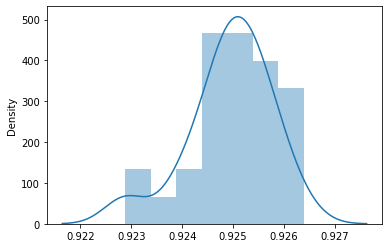

In [90]:
sns.distplot(resultados_naives_bayes_cv);

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


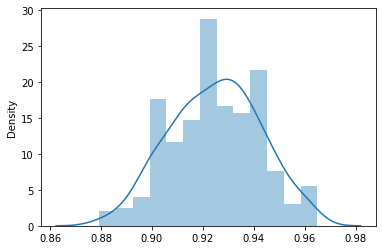

In [91]:
sns.distplot(resultados_naives_bayes_cv_300);

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


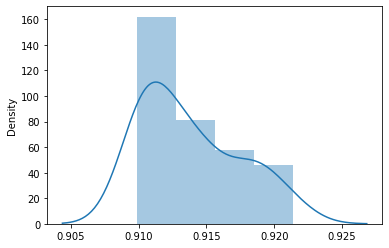

In [92]:
sns.distplot(resultados_regressaologistica_cv);

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


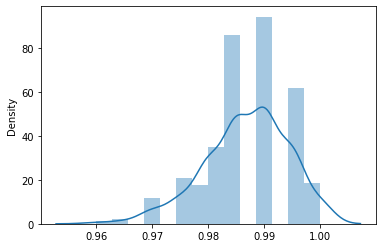

In [93]:
sns.distplot(resultados_regressaologistica_cv_300);

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


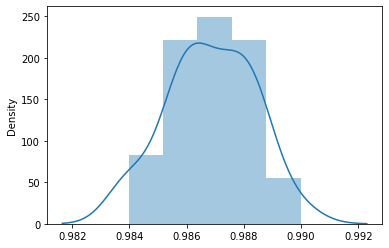

In [94]:
sns.distplot(resultados_randomforest_cv);

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


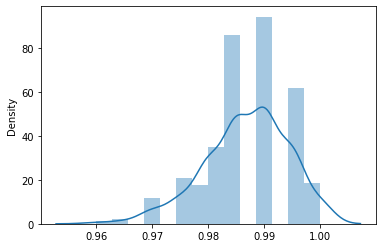

In [95]:
sns.distplot(resultados_randomforest_cv_300);

In [96]:
resultados_naives_bayes_cv.mean(), resultados_regressaologistica_cv.mean(), resultados_randomforest_cv.mean()

(0.9249359296482411, 0.9137817420435511, 0.9868306532663317)

In [100]:
stats.variation(resultados_naives_bayes_cv) * 100, stats.variation(resultados_regressaologistica_cv)*100, stats.variation(resultados_randomforest_cv) * 100

(0.08641071566366061, 0.38801026116292653, 0.15178087948090277)

- intervalo de confiança

In [102]:
from scipy.stats import norm #aqui vamos usar para os casos dos _cv_300
from scipy.stats import t #importamos para menos de 30 registros, que é o caso dos _cv

*Naive Bayes*

In [104]:
intervalos_naive_bayes_t = t.interval(0.95, len(resultados_naives_bayes_cv) -1,
                                      resultados_naives_bayes_cv.mean(),
                                      stats.sem(resultados_naives_bayes_cv, ddof=0))

intervalos_naive_bayes_t

(0.9246374871248957, 0.9252343721715865)

In [105]:
abs(resultados_naives_bayes_cv.mean() - intervalos_naive_bayes_t[1])

0.0002984425233454324

In [106]:
intervalos_naive_bayes_norm = norm.interval(0.95, resultados_naives_bayes_cv_300.mean(),
                                            stats.sem(resultados_naives_bayes_cv_300))

intervalos_naive_bayes_norm

(0.9229333893644709, 0.9269384699320113)

In [110]:
abs(resultados_naives_bayes_cv_300.mean() - intervalos_naive_bayes_norm[1])

0.0020025402837702266

*Regressao Logistica*

In [108]:
intervalos_regressao_logistica_t = t.interval(0.95, len(resultados_regressaologistica_cv) -1,
                                      resultados_regressaologistica_cv.mean(),
                                      stats.sem(resultados_regressaologistica_cv, ddof=0))

intervalos_regressao_logistica_t

(0.9124578055959317, 0.9151056784911705)

In [114]:
abs(resultados_regressaologistica_cv.mean() - intervalos_regressao_logistica_t[1])

0.0013239364476194115

In [120]:
intervalos_regressao_logistica_norm = norm.interval(0.95, resultados_regressaologistica_cv_300.mean(),
                                      stats.sem(resultados_regressaologistica_cv_300))

intervalos_regressao_logistica_norm

(0.985988905877321, 0.9876724006553426)

In [134]:
abs(resultados_regressaologistica_cv_300.mean() - intervalos_regressao_logistica_norm[1])

0.0008417473890107718

*Random Forest*

In [122]:
intervalos_random_forest_t = t.interval(0.95, len(resultados_randomforest_cv)-1,
                                        resultados_randomforest_cv.mean(),
                                        stats.sem(resultados_randomforest_cv_300))

intervalos_random_forest_t

(0.9859522867632876, 0.9877090197693758)

In [135]:
abs(resultados_randomforest_cv.mean()- intervalos_random_forest_t[1])

0.0008783665030440702

In [132]:
intervalos_random_forest_norm = norm.interval(0.95, resultados_randomforest_cv_300.mean(),
                                            stats.sem(resultados_randomforest_cv_300))

intervalos_random_forest_norm

(0.985988905877321, 0.9876724006553426)

In [136]:
abs(resultados_randomforest_cv_300.mean() - intervalos_random_forest_norm[1])

0.0008417473890107718

o algoritimo de Random Forest mostrou ter sido o melhor na acurácia dos modelos, e também a respeito do intervalos de confiança

In [137]:
kfold = KFold(n_splits=10, shuffle=True)
random_forest = RandomForestClassifier()
scores = cross_val_score(random_forest, x, y, cv=kfold)
print(scores.mean())

0.9849798994974874


a media ficou nesse valor, ou seja, temos a confiança de que o algoritimo nos traz esta eficácia média

**Teste de Hipoteses**

In [138]:
dados_originais = np.array([126. , 129.5, 133. , 133. , 136.5, 136.5, 140. , 140. , 140. ,
                            140. , 143.5, 143.5, 143.5, 143.5, 143.5, 143.5, 147. , 147. ,
                            147. , 147. , 147. , 147. , 147. , 150.5, 150.5, 150.5, 150.5,
                            150.5, 150.5, 150.5, 150.5, 154. , 154. , 154. , 154. , 154. ,
                            154. , 154. , 154. , 154. , 157.5, 157.5, 157.5, 157.5, 157.5,
                            157.5, 157.5, 157.5, 157.5, 157.5, 161. , 161. , 161. , 161. ,
                            161. , 161. , 161. , 161. , 161. , 161. , 164.5, 164.5, 164.5,
                            164.5, 164.5, 164.5, 164.5, 164.5, 164.5, 168. , 168. , 168. ,
                            168. , 168. , 168. , 168. , 168. , 171.5, 171.5, 171.5, 171.5,
                            171.5, 171.5, 171.5, 175. , 175. , 175. , 175. , 175. , 175. ,
                            178.5, 178.5, 178.5, 178.5, 182. , 182. , 185.5, 185.5, 189., 192.5])

In [139]:
H0_media = np.mean(dados_originais)
H0_media

159.25

In [140]:
H0_desvio_padrao = np.std(dados_originais)
H0_desvio_padrao

13.65

In [141]:
dados_novos = dados_originais * 1.03
dados_novos

array([129.78 , 133.385, 136.99 , 136.99 , 140.595, 140.595, 144.2  ,
       144.2  , 144.2  , 144.2  , 147.805, 147.805, 147.805, 147.805,
       147.805, 147.805, 151.41 , 151.41 , 151.41 , 151.41 , 151.41 ,
       151.41 , 151.41 , 155.015, 155.015, 155.015, 155.015, 155.015,
       155.015, 155.015, 155.015, 158.62 , 158.62 , 158.62 , 158.62 ,
       158.62 , 158.62 , 158.62 , 158.62 , 158.62 , 162.225, 162.225,
       162.225, 162.225, 162.225, 162.225, 162.225, 162.225, 162.225,
       162.225, 165.83 , 165.83 , 165.83 , 165.83 , 165.83 , 165.83 ,
       165.83 , 165.83 , 165.83 , 165.83 , 169.435, 169.435, 169.435,
       169.435, 169.435, 169.435, 169.435, 169.435, 169.435, 173.04 ,
       173.04 , 173.04 , 173.04 , 173.04 , 173.04 , 173.04 , 173.04 ,
       176.645, 176.645, 176.645, 176.645, 176.645, 176.645, 176.645,
       180.25 , 180.25 , 180.25 , 180.25 , 180.25 , 180.25 , 183.855,
       183.855, 183.855, 183.855, 187.46 , 187.46 , 191.065, 191.065,
       194.67 , 198.

In [142]:
H1_media = np.mean(dados_novos)
H1_media

164.0275

In [143]:
H1_desvio_padrao = np.std(dados_novos)
H1_desvio_padrao

14.0595

In [144]:
H1_n = len(dados_novos)
H1_n

100

In [145]:
alpha = 0.05

- teste de hipotese z

In [146]:
from statsmodels.stats.weightstats import ztest

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [147]:
_, p = ztest(dados_originais, dados_novos,
             value = H1_media - H0_media,
             alternative='larger')

In [148]:
p

0.9999993877283934

- teste de hipotese t

In [149]:
dados_originais = np.array([149. , 160., 147., 189., 175., 168., 156., 160., 152.])

In [150]:
dados_originais.mean(), np.std(dados_originais)

(161.77777777777777, 12.786953227391823)

In [151]:
dados_novos = dados_originais * 1.02
dados_novos

array([151.98, 163.2 , 149.94, 192.78, 178.5 , 171.36, 159.12, 163.2 ,
       155.04])

In [152]:
dados_novos.mean(), np.std(dados_novos)

(165.01333333333332, 13.042692291939664)

In [153]:
from scipy.stats import ttest_rel

In [154]:
_, p = ttest_rel(dados_originais, dados_novos)
p

4.072922493930298e-10

In [155]:
alpha = 0.01
if p <= alpha:
  print('Hipótese nula rejeitada')
else:
  print('Hipótese alternativa rejeitada')

Hipótese nula rejeitada


- teste qui quadrado

In [156]:
from scipy.stats import chi2_contingency

In [157]:
tabela = np.array([[45, 5], [5, 45]])

In [158]:
tabela.shape

(2, 2)

In [159]:
_, p, _, _ = chi2_contingency(tabela)
p

6.190717543917382e-15

In [160]:
alpha = 0.05
if p <= alpha:
  print('Hipótese nula rejeitada')
else:
  print('Hipótese alternativa rejeitada')

Hipótese nula rejeitada


**ANOVA** - ANALISE DE VARIAÇÃO

In [161]:
grupo_a = np.array([165, 152, 143, 140, 155])
grupo_b = np.array([130, 169, 164, 143, 154])
grupo_c = np.array([163, 158, 154, 149, 156])

In [162]:
from scipy.stats import f

In [163]:
f.ppf(1 - 0.05, dfn = 2, dfd = 12)

3.8852938346523933

In [164]:
from scipy.stats import f_oneway

In [165]:
_, p = f_oneway(grupo_a, grupo_b, grupo_c)
p

0.7613994386091956

In [166]:
alpha = 0.05
if p <= alpha:
  print('Hipótese nula rejeitada')
else:
  print('Hipótese alternativa rejeitada')

Hipótese alternativa rejeitada


- Teste de Tukey

In [167]:
dados = {'valores': [165, 152, 143, 140, 155, 130, 169, 164, 143, 154, 163, 158, 154, 149, 156],
         'grupo': ['A', 'A', 'A', 'A', 'A', 'B', 'B', 'B', 'B', 'B', 'C', 'C', 'C', 'C', 'C']}

In [168]:
dados = {'valores': [70, 90, 80, 50, 20, 130, 169, 164, 143, 154, 163, 158, 154, 149, 156],
         'grupo': ['A', 'A', 'A', 'A', 'A', 'B', 'B', 'B', 'B', 'B', 'C', 'C', 'C', 'C', 'C']}

In [169]:
dados_pd = pd.DataFrame(dados)
dados_pd

,valores,grupo
0,70,A
1,90,A
2,80,A
3,50,A
4,20,A
5,130,B
6,169,B
7,164,B
8,143,B
9,154,B


In [170]:
from statsmodels.stats.multicomp import MultiComparison

In [171]:
compara_grupos = MultiComparison(dados_pd['valores'], dados_pd['grupo'])

In [172]:
teste = compara_grupos.tukeyhsd()
print(teste)

Multiple Comparison of Means - Tukey HSD, FWER=0.05
group1 group2 meandiff p-adj  lower   upper  reject
---------------------------------------------------
     A      B     90.0 0.001  58.494 121.506   True
     A      C     94.0 0.001  62.494 125.506   True
     B      C      4.0   0.9 -27.506  35.506  False
---------------------------------------------------


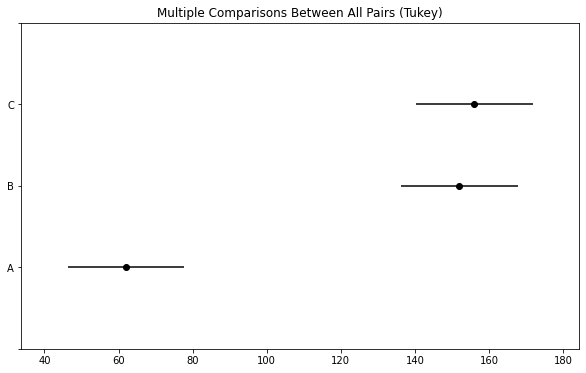

In [173]:
teste.plot_simultaneous();

- Teste de hipótese de Shapiro-Wilk

In [175]:
alpha = 0.5

In [177]:
from scipy.stats import shapiro
shapiro(resultados_naives_bayes_cv), shapiro(resultados_regressaologistica_cv), shapiro(resultados_randomforest_cv)

((0.9171155691146851, 0.02259083092212677),
 (0.8864966630935669, 0.003988792188465595),
 (0.9634578824043274, 0.3784557580947876))

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


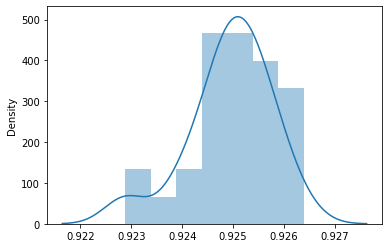

In [179]:

sns.distplot(resultados_naives_bayes_cv);

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


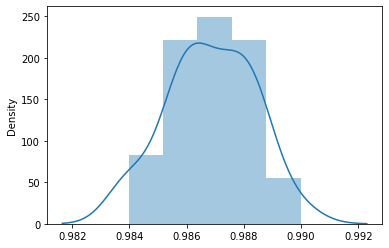

In [180]:
sns.distplot(resultados_randomforest_cv);

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


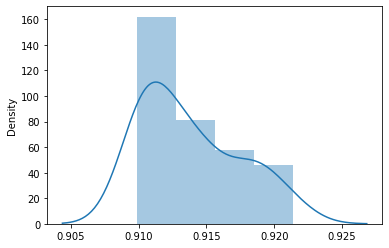

In [181]:
sns.distplot(resultados_regressaologistica_cv);

- Teste de hipótese de D'Agostinho K²

In [183]:
from scipy.stats import normaltest
normaltest(resultados_naives_bayes_cv), normaltest(resultados_regressaologistica_cv), normaltest(resultados_randomforest_cv)

(NormaltestResult(statistic=5.99427246615723, pvalue=0.04992985127827434),
 NormaltestResult(statistic=3.8974107716049797, pvalue=0.1424583808985108),
 NormaltestResult(statistic=0.30656691500897826, pvalue=0.8578865129732348))

- Teste de hipótese de Anderson-Darling

In [185]:
from scipy.stats import anderson
anderson(resultados_naives_bayes_cv).statistic, anderson(resultados_regressaologistica_cv).statistic, anderson(resultados_randomforest_cv).statistic

(0.92994483424728, 1.1807882152762872, 0.3956277426413841)

- TESTES DE WILCOXON e friedman

In [186]:
from scipy.stats import friedmanchisquare

In [189]:
_, p = friedmanchisquare(resultados_naives_bayes_cv, resultados_regressaologistica_cv, resultados_randomforest_cv)
p

9.357622968840163e-14

In [190]:
alpha = 0.5

In [192]:
from scipy.stats import wilcoxon
_, p = wilcoxon(resultados_naives_bayes_cv, resultados_regressaologistica_cv)
p

1.7343976283205784e-06

In [194]:
_, p = wilcoxon(resultados_naives_bayes_cv, resultados_randomforest_cv)
p

1.7333066441991056e-06

In [195]:
_, p = wilcoxon(resultados_regressaologistica_cv, resultados_randomforest_cv)
p

1.7343976283205784e-06